# Laplace-Transformationen in `Python` mit der `sympy`-Library

#### `sympy` ("symbolic python"): nützlich für symbolische / analytische Berechnungen

In [48]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 1. Prototypisches Beispiel: LT von $ e^{-a t}$
### a) Symbole und funktionen definitieren:

In [2]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [3]:
f = sympy.exp(-a*t)

In [4]:
f

### b) Laplace-Integral explizit ausrechnen:
$$
\boxed{\mathcal{L}(f ; s)=\int_{0}^{\infty} \mathrm{e}^{-s t} f(t) d t,\quad \text{$\forall s$ für welche das Integral konvergiert.}}
$$
- `sympy.oo` $\Leftrightarrow \infty$

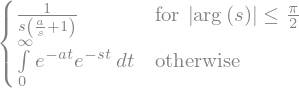

In [6]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

### c) Es geht auch einfacher: Die `sympy.laplace_transform`-Library:

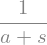

In [21]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

## 2. Eine Tabelle von LTen
### a) LT als Python-Funktion definieren

In [8]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

### b) Symbole und Funktionen definieren

In [13]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

### c) Liste von Laplace-Trafos erstellen

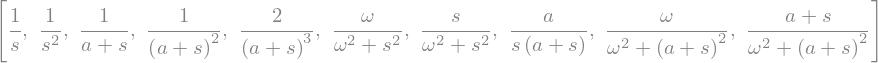

In [14]:
Fs = [L(f) for f in functions]
Fs

### d) Tabellarische Darstellung

In [15]:
from pandas import DataFrame

In [16]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [59]:
df = DataFrame({"Originalfunktion" : makelatex(functions[0:-2]),
                "Bildfunktion" : makelatex(Fs[0:-2])},
                list(np.arange(1,9)))
df

,Originalfunktion,Bildfunktion
1,$$1$$,$$\frac{1}{s}$$
2,$$t$$,$$\frac{1}{s^{2}}$$
3,$$e^{- a t}$$,$$\frac{1}{a + s}$$
4,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
5,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
6,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
7,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
8,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$


In [53]:
? export

Object ` export` not found.


## Inverse LTen

In [9]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [10]:
invL(F)

In [11]:
invL(F).subs({a: 2})

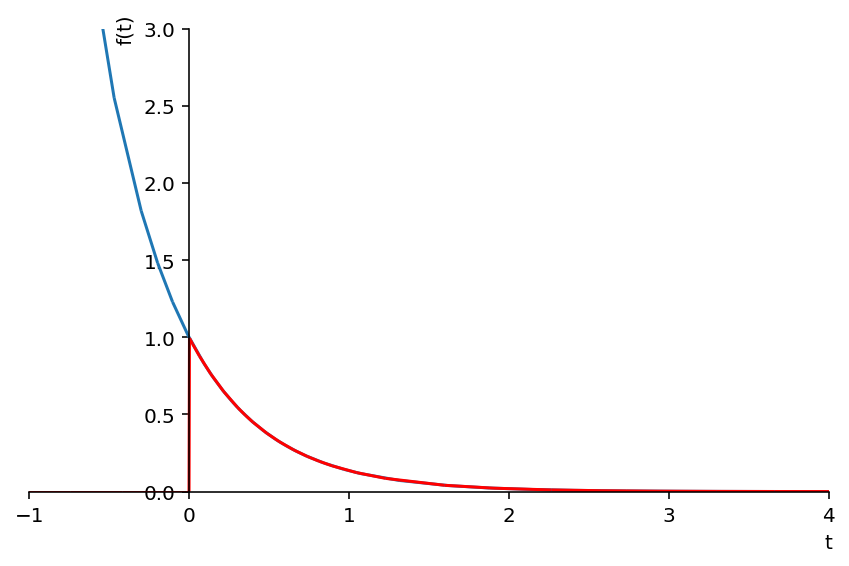

In [49]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()

In [64]:
df1 = DataFrame({"Originalfunktion" : makelatex(functions[0:-6]),
                "Bildfunktion" : makelatex(Fs[0:-6])},
                list(np.arange(1,5)))
df1

,Originalfunktion,Bildfunktion
1,$$1$$,$$\frac{1}{s}$$
2,$$t$$,$$\frac{1}{s^{2}}$$
3,$$e^{- a t}$$,$$\frac{1}{a + s}$$
4,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$


In [70]:
df2 = DataFrame({"Originalfunktion" : makelatex(functions[-6:-2]),
                "Bildfunktion" : makelatex(Fs[-6:-2])})
df2

,Originalfunktion,Bildfunktion
0,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
1,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
2,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
3,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$


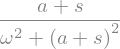

In [63]:
Fs[-1]